In [6]:
%run "../../../common/0_notebooks_base_setup.py"   

/Users/ctalamilla/Desktop/DH_DataScience/clase_04/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles para resolver los ejercicios de esta práctica.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [1]:
import numpy as np

In [2]:
data_type_default = np.genfromtxt('../Data/sales_data_sample_excercise.csv', 
                                  skip_header=1, 
                                  delimiter='\t',
                                  dtype= str)

In [3]:
data_type_default

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

## Ejercicio 2

La función `distribution_plotter` grafica los datos que recibe como parámetro en una instancia de numpy array

Graficar los precios de ventas en tres países. ¿Qué pueden decir respecto a sus distribuciones?

Comparar las distribuciones con la de los precios de ventas sin distinguir por paises

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def distribution_plotter(data, label, bin_width=500):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

In [19]:
np.unique(data_type_default[:, 5])

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Ireland', 'Italy', 'Japan', 'Norway',
       'Philippines', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'UK',
       'USA'], dtype='<U16')

In [20]:
data_type_default[:, 5]=='Australia'

array([False, False, False, ..., False, False, False])

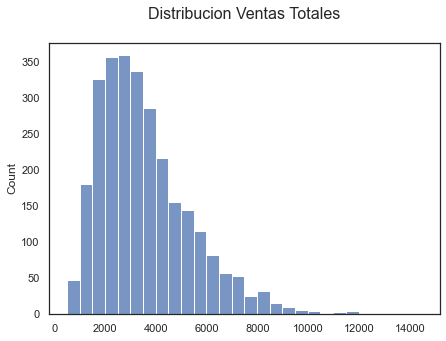

In [25]:
distribution_plotter(data_type_default[:,1].astype(float), 'Ventas Totales')

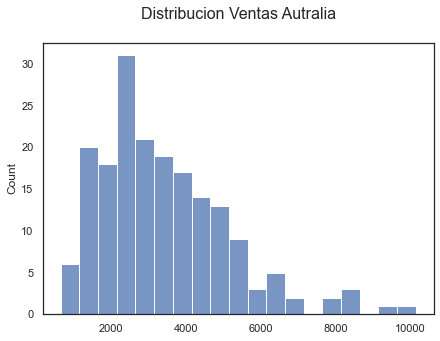

In [22]:
distribution_plotter(data_type_default[data_type_default[:, 5]=='Australia',1].astype(float), 'Ventas Autralia')

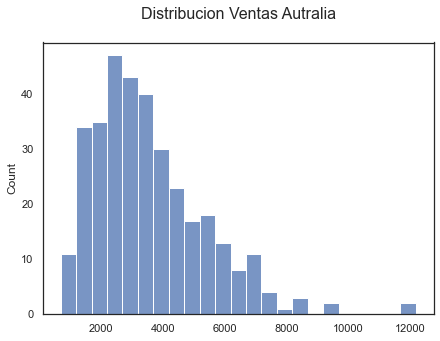

In [23]:
distribution_plotter(data_type_default[data_type_default[:, 5]=='Spain',1].astype(float), 'Ventas Autralia')

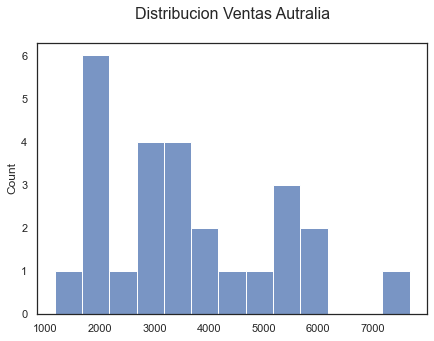

In [24]:
distribution_plotter(data_type_default[data_type_default[:, 5]=='Philippines',1].astype(float), 'Ventas Autralia')

## Ejercicio 3
Para los tres países del punto anterior, calcular con dos decimales
* Media
* Mediana
* Rango
* Desvío estandard

Repetir para todos los datos de ventas sin distinguir por país.

¿Qué conclusiones pueden sacar respecto a la información que brinda cada una de estas medidas en este caso particular?

In [45]:
resultado = {}
for i in['Australia', 'Spain', 'Philippines']:
    datos = data_type_default[data_type_default[:, 5]==i,1].astype(float)
    #resultado['pais'] = i
    resultado['media']= np.mean(datos).round(2)
    resultado['mediana']= np.median(datos).round(2)
    resultado['rango']= np.max(datos) - np.min(datos).round(2)
    resultado['std']= np.std(datos).round(2)
    print (f'{i}\n {resultado} \n ==============')
    

Australia
 {'media': 3408.77, 'mediana': 3070.4, 'rango': 9121.68, 'std': 1749.41} 
Spain
 {'media': 3554.64, 'mediana': 3213.8, 'rango': 11317.2, 'std': 1833.14} 
Philippines
 {'media': 3615.99, 'mediana': 3329.31, 'rango': 6310.83, 'std': 1582.56} 
